In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from google.colab import files
import zipfile
import io
import os
import matplotlib.image as mpimg
import random
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
!unzip -q "/content/gdrive/My Drive/dataset/newdata.zip"

In [5]:
from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array, load_img
from keras.applications import InceptionResNetV2

Using TensorFlow backend.


In [6]:
conv_base = InceptionResNetV2(weights='imagenet', include_top=False, input_shape=(200,200,3))














219062272/219055592 [==============================] - 14s 0us/step


In [7]:
conv_base.summary()

Model: "inception_resnet_v2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 200, 200, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 99, 99, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 99, 99, 32)   96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 99, 99, 32)   0           batch_normalization_1[0][0]      
________________________________________________________________________________

In [0]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(5, activation='sigmoid'))

In [9]:
print('Number of trainable weights before freezing the conv base:', len(model.trainable_weights))
conv_base.trainable = False
print('Number of trainable weights after freezing the conv base:', len(model.trainable_weights))

Number of trainable weights before freezing the conv base: 492
Number of trainable weights after freezing the conv base: 4


In [10]:
model.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=2e-5), metrics=['acc'])

In [11]:
# ImageDataGenerator object instance with scaling
    train_datagen = ImageDataGenerator(rescale=1/255)
# Flow training images in batches using the generator
    train_generator = train_datagen.flow_from_directory(
            "newdata/data/train/",  # This is the source directory for training images
            target_size=(200,200),  # All images will be resized to 200 x 200
            batch_size=128,
            # Specify the classes explicitly
            classes = ['bike','car','motor','truck','van'],
            # Since we use categorical_crossentropy loss, we need categorical labels
            class_mode='categorical')

Found 2764 images belonging to 5 classes.


In [12]:
# ImageDataGenerator object instance with scaling
    val_datagen = ImageDataGenerator(rescale=1/255)
# Flow training images in batches using the generator
    val_generator = val_datagen.flow_from_directory(
            "newdata/data/val/",  # This is the source directory for val images
            target_size=(200,200),  # All images will be resized to 200 x 200
            batch_size=128,
            # Specify the classes explicitly
            classes = ['bike','car','motor','truck','van'],
            # Since we use categorical_crossentropy loss, we need categorical labels
            class_mode='categorical')

Found 400 images belonging to 5 classes.


In [13]:
history = model.fit_generator(train_generator,
                              steps_per_epoch=2764 // 128,
                              epochs= 20,
                              validation_data = val_generator,
                              validation_steps = 319 // 128)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/20
21/21 [==============================] - 51s 2s/step - loss: 1.0161 - acc: 0.6528 - val_loss: 0.2246 - val_acc: 0.9219
Epoch 2/20
21/21 [==============================] - 25s 1s/step - loss: 0.5585 - acc: 0.8225 - val_loss: 0.1496 - val_acc: 0.9514
Epoch 3/20
21/21 [==============================] - 24s 1s/step - loss: 0.4053 - acc: 0.8855 - val_loss: 0.3588 - val_acc: 0.8828
Epoch 4/20
21/21 [==============================] - 24s 1s/step - loss: 0.3282 - acc: 0.9036 - val_loss: 0.2469 - val_acc: 0.9375
Epoch 5/20
21/21 [==============================] - 25s 1s/step - loss: 0.2713 - acc: 0.9279 - val_loss: 0.2278 - val_acc: 0.9219
Epoch 6/20
21/21 [==============================] - 24s 1s/step - loss: 0.2177 - acc: 0.9504 - val_loss: 0.7998 - val_acc: 0.9028
Epoch 7/20
21/21 [==============================] - 25s 1s/step - loss: 0.1737 - acc: 0.9658 - val_loss: 0.5337 - val_acc: 0

In [19]:
!ls gdrive/My\ Drive/dataset/

auto.png  data.zip  firstdata.zip  moviedb  newdata.zip


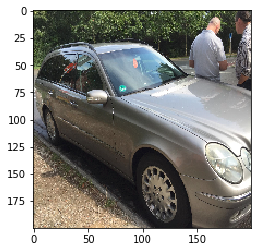

In [20]:
from PIL import Image
img = Image.open('gdrive/My Drive/dataset/auto.png')
img = img.resize((200,200))
plt.imshow(img)
import numpy as np
img=np.expand_dims(img, axis=0)

In [21]:
model.predict(img)

array([[ 1.,  1.,  1.,  1., nan]], dtype=float32)

In [0]:
!pip install -q pyyaml h5py
model.save('resnetmodel.h5')

In [16]:
!ls

gdrive	newdata  resnetmodel.h5  sample_data


In [17]:
from google.colab import files
f = 'resnetmodel.h5'
files.download(f)

----------------------------------------
Exception happened during processing of request from ('::ffff:127.0.0.1', 47168, 0, 0)
Traceback (most recent call last):
  File "/usr/lib/python3.6/socketserver.py", line 320, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/usr/lib/python3.6/socketserver.py", line 351, in process_request
    self.finish_request(request, client_address)
  File "/usr/lib/python3.6/socketserver.py", line 364, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/usr/lib/python3.6/socketserver.py", line 724, in __init__
    self.handle()
  File "/usr/lib/python3.6/http/server.py", line 418, in handle
    self.handle_one_request()
  File "/usr/lib/python3.6/http/server.py", line 406, in handle_one_request
    method()
  File "/usr/lib/python3.6/http/server.py", line 639, in do_GET
    self.copyfile(f, self.wfile)
  File "/usr/lib/python3.6/http/server.py", line 800, in copyfile
    shutil.copyfil